The reference website that links the dataset. This also explains the methods to tidy the dataset. The methods that are on the site were mostly use to understand the data. The only ones used were the select the columns with the select function
https://blog.exploratory.io/tidy-untidy-united-nations-migration-data-with-tidyr-167cbd24c5c2

In [ ]:
df_wide<- read.csv("Users//falberto//Documents//IS362_Project 2//.csv", header=FALSE, sep=",")
df2_wide<-df_wide[-c(1:15),]
head(df2_wide[1:10])

In [ ]:
##      V1      V2                        V3 V4  V5 V6          V7
## 16                                                        Total
## 17 1990 1990001                     WORLD    900    153,011,473
## 18 1990 1990002     UN development groups                    ..
## 19 1990 1990003    More developed regions  b 901     82,767,216
## 20 1990 1990004    Less developed regions  c 902     70,244,257
## 21 1990 1990005 Least developed countries  d 941     11,060,221
##             V8          V9         V10
## 16 Other South Other North Afghanistan
## 17   6,548,526   2,366,800   6,823,350
## 18          ..          ..          ..
## 19   3,385,103   1,077,179     119,386
## 20   3,163,423   1,289,621   6,703,964
## 21     482,753     239,756           0

There are approximately over 200 variable in the country columns. The countries of Destination will be picked to turn into rows. The Subset will be applied on the Country of Origin. The Country of origin being United States of America.

In [ ]:
library(dplyr)

In [ ]:
## 
## Attaching package: 'dplyr'

In [ ]:
## The following objects are masked from 'package:stats':
## 
##     filter, lag

In [ ]:
## The following objects are masked from 'package:base':
## 
##     intersect, setdiff, setequal, union

In [ ]:
library(tidyr)
df3_wide<-select(df2_wide,-V2,-V4,-V5,-V7)
df4_wide<-rename(df3_wide,Year=V1,Origin=V3,group=V6,Afghanistan=V10,Albania=V11,Algeria=V12,Angola=V15)
df5_wide<- subset(df4_wide,Origin=="United States of America")
df6_wide<-select(df5_wide,Year,Origin,Afghanistan,Albania,Algeria,Angola)
df2_long<-gather(df6_wide,Destination,Persons,-Origin,-Year)

In [ ]:
## Warning: attributes are not identical across measure variables;
## they will be dropped

In [ ]:
df2_long

In [ ]:
##    Year                   Origin Destination Persons
## 1  1990 United States of America Afghanistan  28,444
## 2  1995 United States of America Afghanistan  37,312
## 3  2000 United States of America Afghanistan  46,342
## 4  2005 United States of America Afghanistan  51,965
## 5  2010 United States of America Afghanistan  59,330
## 6  2015 United States of America Afghanistan  74,106
## 7  2019 United States of America Afghanistan  80,026
## 8  1990 United States of America     Albania   5,627
## 9  1995 United States of America     Albania  22,440
## 10 2000 United States of America     Albania  39,644
## 11 2005 United States of America     Albania  54,825
## 12 2010 United States of America     Albania  72,085
## 13 2015 United States of America     Albania  91,865
## 14 2019 United States of America     Albania  99,205
## 15 1990 United States of America     Algeria   4,629
## 16 1995 United States of America     Algeria   7,859
## 17 2000 United States of America     Algeria  11,158
## 18 2005 United States of America     Algeria  12,680
## 19 2010 United States of America     Algeria  14,633
## 20 2015 United States of America     Algeria  19,633
## 21 2019 United States of America     Algeria  21,201
## 22 1990 United States of America      Angola   2,252
## 23 1995 United States of America      Angola   3,352
## 24 2000 United States of America      Angola   4,475
## 25 2005 United States of America      Angola   7,294
## 26 2010 United States of America      Angola  10,411
## 27 2015 United States of America      Angola  14,068
## 28 2019 United States of America      Angola  15,192

The chart was created to show relationship between United Stated migration to Afghanistan. The Chart shows the number of people that are migrating to a specific country. This is shown by the year.In the chart shows the number of people migrating to Afghanistan from the US. Which it has been increasing roughly every 5 years from about 28,000 in the year 1990 to 80,000 in 2019.

In [ ]:
library(ggplot2)
df3_long<-subset(df2_long,Destination=="Afghanistan")
ggplot(df3_long, aes(x=df3_long$Year, y=df3_long$Persons, fill=df3_long$Destination)) + geom_bar(stat='identity', position='dodge')

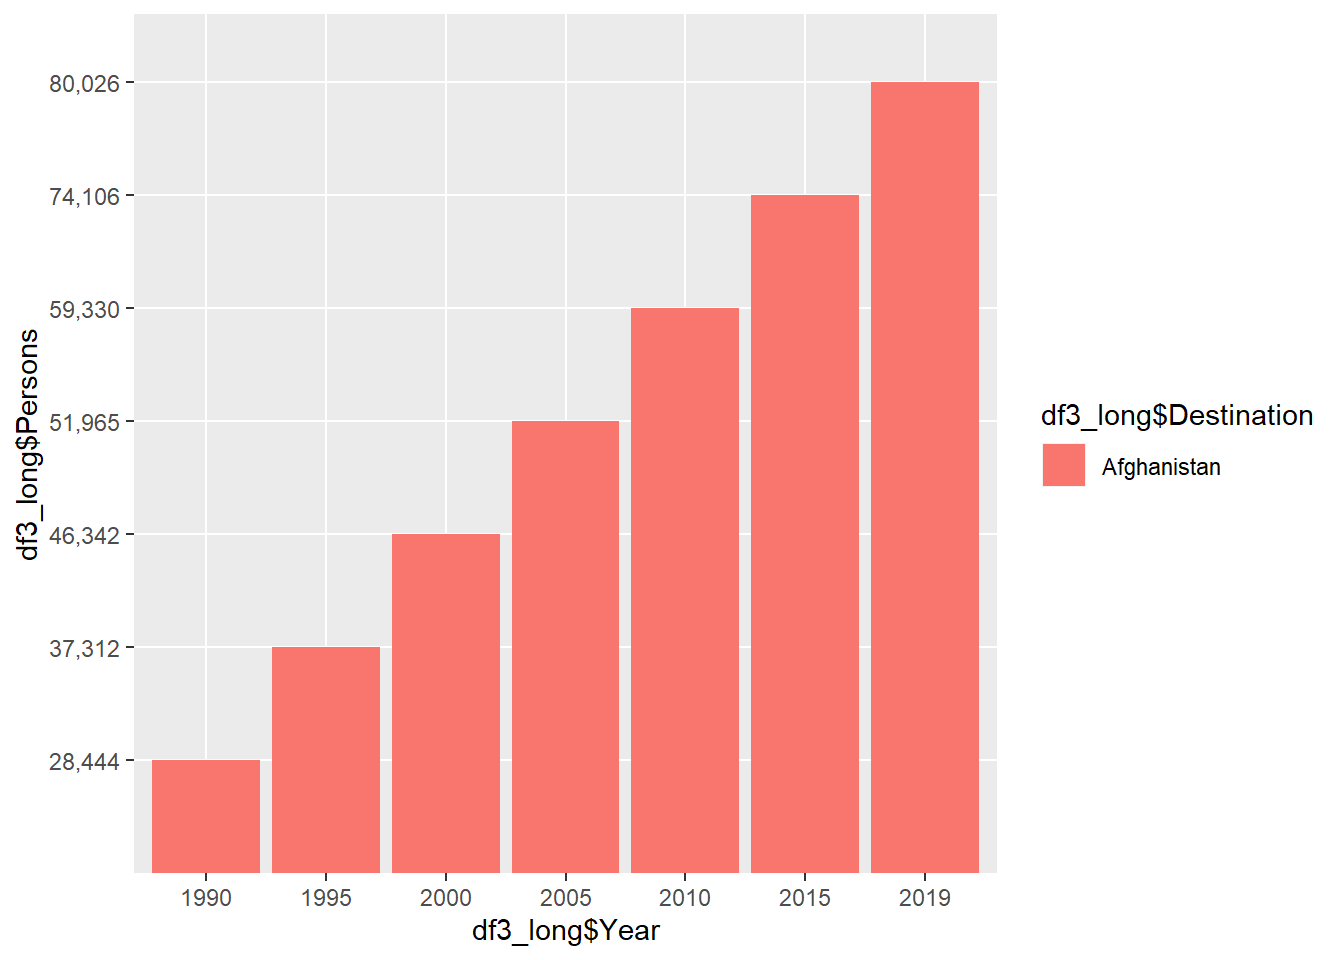